In [1]:
import numpy as np
import os
import scipy
from scipy.io import wavfile

c:\ProgramData\anaconda3\envs\speech_recognition\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_paths = []
labels = []
spoken = []

base_path = './Audio'

# print(os.listdir(base_path))

for fol in os.listdir(base_path):
    for file in os.listdir(base_path + '/' + fol):
        file_paths.append(base_path + '/' + fol + '/' + file)
        labels.append(fol)
        if fol not in spoken:
            spoken.append(fol)
            
print(file_paths)
print(labels)
print(spoken)

['./Audio/apple/apple0.wav', './Audio/apple/apple01.wav', './Audio/apple/apple02.wav', './Audio/apple/apple03.wav', './Audio/apple/apple04.wav', './Audio/apple/apple05.wav', './Audio/apple/apple06.wav', './Audio/apple/apple07.wav', './Audio/apple/apple08.wav', './Audio/apple/apple09.wav', './Audio/apple/apple1.wav', './Audio/apple/apple10(1).wav', './Audio/apple/apple10.wav', './Audio/apple/apple11(1).wav', './Audio/apple/apple11.wav', './Audio/apple/apple12(1).wav', './Audio/apple/apple12.wav', './Audio/apple/apple13(1).wav', './Audio/apple/apple13.wav', './Audio/apple/apple14(1).wav', './Audio/apple/apple14.wav', './Audio/apple/apple15.wav', './Audio/apple/apple2.wav', './Audio/apple/apple3.wav', './Audio/apple/apple4.wav', './Audio/apple/apple5.wav', './Audio/apple/apple6.wav', './Audio/apple/apple7.wav', './Audio/apple/apple8.wav', './Audio/apple/apple9.wav', './Audio/banana/banana01.wav', './Audio/banana/banana02.wav', './Audio/banana/banana03.wav', './Audio/banana/banana04.wav', 

In [3]:
rate, d = wavfile.read('./Audio/apple/apple01.wav')
print(rate)
print(d.shape[0])

8000
2694


In [4]:
data = np.zeros((len(file_paths), 32000))
max_sample_rate = -1

for n, file in enumerate(file_paths):
    _, d = wavfile.read(file)
    data[n, :d.shape[0]] = d
    if d.shape[0] > max_sample_rate:
        max_sample_rate = d.shape[0]
    
data = data[:, :max_sample_rate]

# print(data.shape)

all_labels = np.zeros(len(labels))

for n, l in enumerate(set(labels)):
    print(n, l)
    all_labels[ np.array([i for i, lab in enumerate(labels) if lab == l]) ] = n
    
print(all_labels)

0 book
1 eye
2 kiwi
3 dog
4 human
5 peach
6 banana
7 fast
8 orange
9 god
10 lime
11 cat
12 pineapple
13 apple
[13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. 12. 12. 12. 12. 12. 12.
 12. 12. 12. 1

In [5]:
dictionary = [''] * 14

for i in range(0, len(labels)):
    dictionary[ int(all_labels[i]) ] = labels[i]

print(dictionary)

['book', 'eye', 'kiwi', 'dog', 'human', 'peach', 'banana', 'fast', 'orange', 'god', 'lime', 'cat', 'pineapple', 'apple']


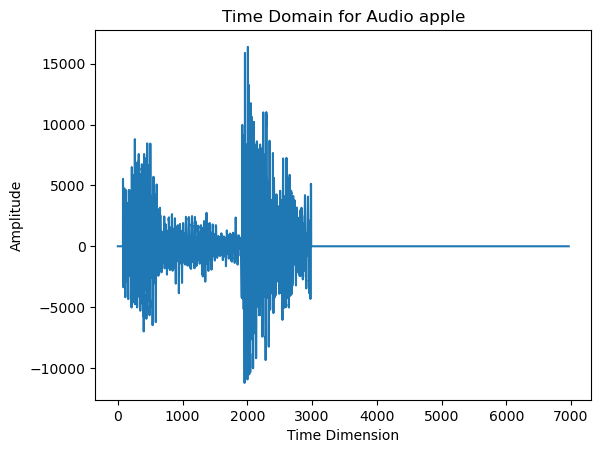

In [6]:
import matplotlib.pyplot as plt

plt.plot(data[0, :])
plt.title(f'Time Domain for Audio {labels[0]}')
plt.xlabel('Time Dimension')
plt.ylabel('Amplitude')
plt.show()

In [7]:
def stft(x, fftsize=64, overlap_pct=0.5):
    w = np.hanning(fftsize + 1)[:-1]
    
    hop = int(fftsize * (1 - overlap_pct))
    
    raw = np.array([
        (np.fft.rfft(w * x[i:i+fftsize])) for i in range(0, len(x) - fftsize, hop)
    ])
    
    return raw[:, :(fftsize // 2)]

In [8]:
from numpy.lib.stride_tricks import as_strided

def peakfind(x, n_peaks, l_size=3, c_size=3, r_size=3):
    win_size = l_size + c_size + r_size
    shape = x.shape[:-1] + (x.shape[-1] - win_size, win_size)
    strides = x.strides + (x.strides[-1], )
    
    xs = as_strided(x, shape=shape, strides=strides)
    
    def is_peak(x):
        centered = (np.argmax(x) == l_size + (c_size/2))
        
        l = x[:l_size]
        c = x[l_size:l_size + c_size]
        r = x[-r_size:]
        max = np.max(c) > np.max([np.mean(l), np.mean(r)])
        
        if centered and max:
            return np.max(c)
        else:
            return -1
        
    r = np.apply_along_axis(is_peak, 1, xs)
    top = np.argsort(r, None)[::-1]
    heights = r[top[:n_peaks]]
    
    top[top > -1] = top[top > -1] + l_size + int(c_size/2)
    
    return heights, top[:n_peaks]

In [11]:
all_obs = []

for i in range(data.shape[0]):
    d = np.abs(stft(data[i, :]))
    n_dim = 6
    obs = np.zeros((n_dim, d.shape[0]))
    
    for r in range(d.shape[0]):
        _, top = peakfind(d[r, :], n_peaks=n_dim)
        obs[:, r] = top.copy()
        
    if i % 10 == 0:
        print(f'Processed Obs-{i}')
        
    all_obs.append(obs)

all_obs = np.atleast_3d(all_obs)

Processed Obs-0
Processed Obs-10
Processed Obs-20
Processed Obs-30
Processed Obs-40
Processed Obs-50
Processed Obs-60
Processed Obs-70
Processed Obs-80
Processed Obs-90
Processed Obs-100
Processed Obs-110
Processed Obs-120
Processed Obs-130
Processed Obs-140
Processed Obs-150
Processed Obs-160
Processed Obs-170
Processed Obs-180
Processed Obs-190
Processed Obs-200
Processed Obs-210
Processed Obs-220


In [ ]:
class HMMGMM:
    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)
    
    def _stochastisize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)